# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!python -m pip install --upgrade numpy==1.13.3
#!python -m pip install --upgrade prompt-toolkit==1.0.15
!pip -q install ./python

    100% |████████████████████████████████| 17.0MB 2.5MB/s eta 0:00:01   46% |██████████████▉                 | 7.9MB 42.0MB/s eta 0:00:01
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 1.0


When finished, you can close the environment.

In [ ]:
print("hel")
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [6]:
from collections import deque
from IPython.display import clear_output
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
#env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

In [7]:
#env.close()

In [9]:
from dqn_agent import Agent
brain_name = env.brain_names[0]
brain = env.brains[brain_name]


agent = Agent(state_size=8, action_size=4, seed=0)

def dqn(n_episodes=10, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    scores_window = deque(maxlen=100)
    scores = []
    
    for i_episode in range(1, n_episodes+1):
        print("i_e:", i_episode)
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0] 
        score = 0
        
        print("i_episode:", i_episode)
        for t in range(max_t):
            #action = np.random.randint(action_size)        
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]                   
            done = env_info.local_done[0]                  
            agent.step(state, action, reward, next_state, done)
            score += reward                                
            state = next_state                             
            if done:                                       
                break
        scores_window.append(score)
        scores.append(score)
        clear_output()
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        #if np.mean(scores_window)>=200.0:
         #   print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
          #  torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
         #   break
                      
    return scores

TypeError: 'maxle' is an invalid keyword argument for this function

Episode 10	Average Score: 0.20


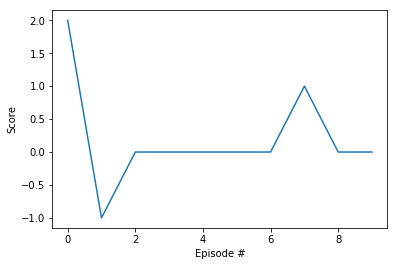

In [9]:

import matplotlib.pyplot as plt
scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
env.close()

In [ ]:
####################################################################

In [1]:
!python -m pip install --upgrade numpy==1.13.3
#!python -m pip install --upgrade prompt-toolkit==1.0.15
!pip -q install ./python

from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

from collections import deque
from IPython.display import clear_output
from unityagents import UnityEnvironment
import numpy as np

!curl -O https://raw.githubusercontent.com/udacity/workspaces-student-support/master/jupyter/workspace_utils.py


    100% |████████████████████████████████| 17.0MB 2.0MB/s eta 0:00:01  3% |█                               | 512kB 35.4MB/s eta 0:00:01    21% |██████▊                         | 3.6MB 30.2MB/s eta 0:00:01    57% |██████████████████▎             | 9.7MB 35.5MB/s eta 0:00:01    89% |████████████████████████████▉   | 15.3MB 28.4MB/s eta 0:00:01    98% |███████████████████████████████▌| 16.7MB 29.3MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1554  100  1554    0     0   9404      0 --:--:-- --:--:-- --:--:-- 11343


In [15]:
import importlib
import dqn_agent
importlib.reload(dqn_agent)
from dqn_agent import Agent

brain_name = env.brain_names[0]
brain = env.brains[brain_name]


agent = Agent(state_size=state_size, action_size=action_size, seed=0)
agent.use_prioritized_ER(True)

def dqn(n_episodes=1500, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    scores_window = deque(maxlen=100)
    scores = []
    eps = eps_start
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0] 
        score = 0
        
        for t in range(max_t):
            #action = np.random.randint(action_size)        
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]        
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]                   
            done = env_info.local_done[0]
            
            agent.step(state, action, reward, next_state, done)
            score += reward                                
            state = next_state                             
            if done:                                       
                break
        scores_window.append(score)
        scores.append(score)
        #lear_output()
        eps = max(eps_end, eps_decay*eps)
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage 100 Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            if np.mean(scores_window)>=13:
                pass
                #print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            #torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            #break
                      
    return scores

loaded


In [ ]:
import matplotlib.pyplot as plt
from workspace_utils import active_session

with active_session():
    scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average 100 Score: 0.43
Episode 200	Average 100 Score: 2.07
Episode 300	Average 100 Score: 6.35
Episode 400	Average 100 Score: 10.09
Episode 500	Average 100 Score: 12.39
Episode 600	Average 100 Score: 13.91
Episode 700	Average 100 Score: 13.60
Episode 800	Average 100 Score: 14.55


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [18]:
import torch
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
print(y)
w = y.mean()
w.backward()
print(x.grad)
z = y * y * 3
out = z.mean()

print(z, out)
out.backward()
print(x.grad)

tensor([[ 3.,  3.],
        [ 3.,  3.]])
tensor([[ 0.2500,  0.2500],
        [ 0.2500,  0.2500]])
tensor([[ 27.,  27.],
        [ 27.,  27.]]) tensor(27.)
tensor([[ 4.7500,  4.7500],
        [ 4.7500,  4.7500]])


In [19]:
#idle workspace
